In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
sns.set()

# Import data

In [3]:
df = pd.read_csv('/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/data/income_per_day.csv')

In [4]:
for lag in range(1,5, 2):
    df[f'Lag{lag}'] = df['income'].shift(lag)
df['RollingMean'] = df['income'].rolling(window=3).mean()
df.dropna(inplace=True)

# Convert Date to numeric features
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [5]:
df

,date,income,Lag1,Lag3,RollingMean,Year,Month,Day
3,2010-12-05,1.294085e+08,1.648220e+08,3.460146e+08,1.458388e+08,2010,12,5
4,2010-12-06,3.786618e+08,1.294085e+08,1.432860e+08,2.242974e+08,2010,12,6
5,2010-12-07,1.635399e+08,3.786618e+08,1.648220e+08,2.238701e+08,2010,12,7
6,2010-12-08,2.269111e+08,1.635399e+08,1.294085e+08,2.563709e+08,2010,12,8
7,2010-12-09,2.702469e+08,2.269111e+08,3.786618e+08,2.202326e+08,2010,12,9
...,...,...,...,...,...,...,...,...
300,2011-12-05,1.635399e+08,6.928137e+07,2.770526e+08,1.706098e+08,2011,12,5
301,2011-12-06,3.008440e+08,1.635399e+08,2.790082e+08,1.778884e+08,2011,12,6
302,2011-12-07,3.584565e+08,3.008440e+08,6.928137e+07,2.742801e+08,2011,12,7
303,2011-12-08,7.515071e+08,3.584565e+08,1.635399e+08,4.702692e+08,2011,12,8


In [6]:
df.set_index('date', inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns='income'),
        df[['income']],
        test_size = 0.2, 
        random_state = 42,
        shuffle=False)


In [8]:
# Split data into training and test sets
#train_size = int(len(df) * 0.8)
#train, test = df[:train_size], df[train_size:]
#train.set_index('date', inplace=True)#.drop(columns='date', inplace=True)
#test.set_index('date', inplace=True)#.drop(columns='date', inplace=True)

#X_train, y_train = train.drop(columns='income'), train['income']
#X_test, y_test = test.drop(columns='income'), test['income']


In [9]:
# Function to create pipelines
def create_pipeline(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    return pipeline

# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# Dictionary to store results
results = {}

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'LightGBM': LGBMRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    results[name] = train_and_evaluate(model, X_train, y_train, X_test, y_test)

# Special Case: ARIMA (handled separately since it's not compatible with sklearn's pipeline)
def train_and_evaluate_arima(y_train, y_test, order=(5,1,0)):
    arima_model = ARIMA(y_train, order=order)
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(y_test))
    mse = mean_squared_error(y_test, arima_forecast)
    return mse

results['ARIMA'] = train_and_evaluate_arima(y_train, y_test)

pd.DataFrame(results.items())

/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 5
[LightGBM] [Info] Start training from score 111874713.414419
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/py

,0,1
0,Linear Regression,1.223159e+16
1,Random Forest,2.566164e+16
2,XGBoost,5.690149e+16
3,CatBoost,4.364385e+16
4,LightGBM,3.281462e+16
5,ARIMA,4.660316e+16


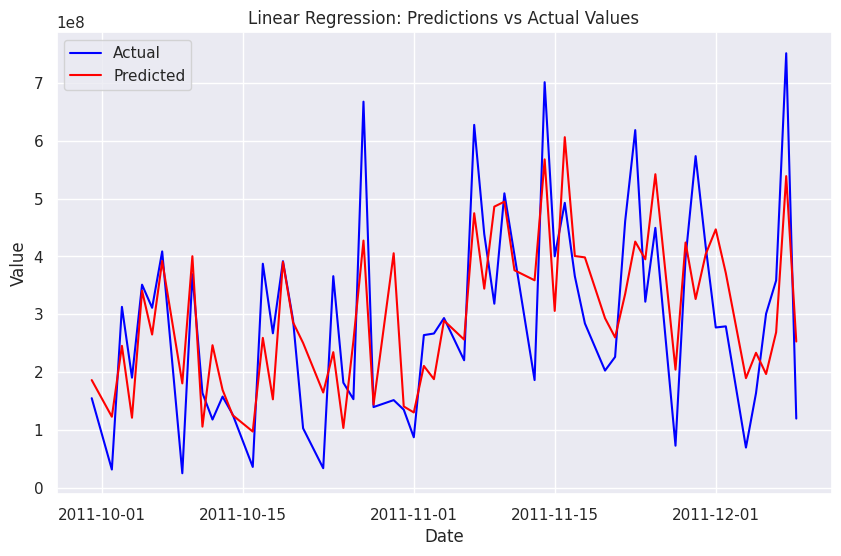

In [25]:
# Create and train the Random Forest Regressor pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred1 = pipeline.predict(X_test)

# Plot the predictions vs the actual test data
plt.figure(figsize=(10, 6))
#plt.plot(X_train.index, y_train, label='Training', color='g')
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_pred1, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression: Predictions vs Actual Values')
plt.legend()
plt.show()

In [28]:
# Create a pipeline for Linear Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define the parameter grid for grid search specific to LinearRegression
param_grid = {
    'model__fit_intercept': [True, False],
    'model__copy_X': [True, False]  # Prefix with 'model__' since it's inside the pipeline
}

# Set up the grid search with TimeSeriesSplit for time series data
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters: ", best_params)
print("Best Score: ", grid_search.best_score_)

# Predict with the best model
y_pred = best_model.predict(X_test)


Best Parameters:  {'model__copy_X': True, 'model__fit_intercept': True}
Best Score:  -5839688363901248.0


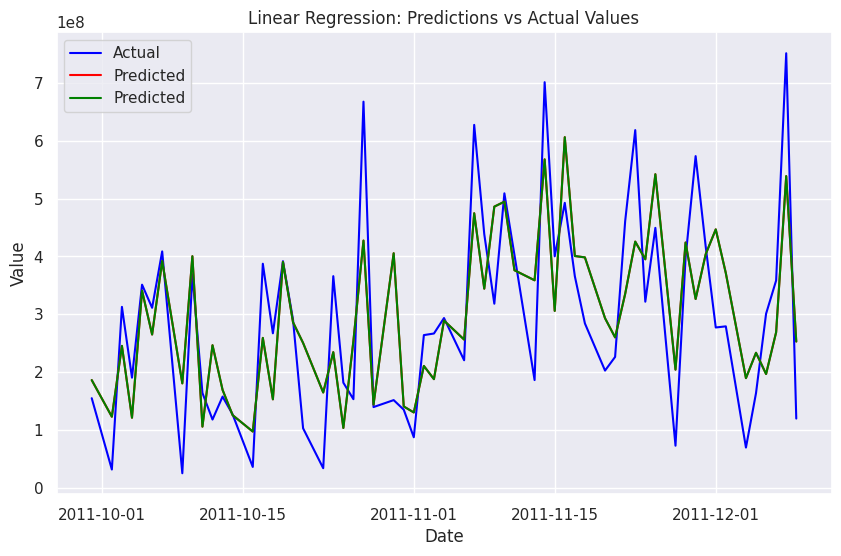

In [29]:
# Plot the predictions vs the actual test data
plt.figure(figsize=(10, 6))
#plt.plot(X_train.index, y_train, label='Training', color='g')
plt.plot(X_test.index, y_test, label='Actual', color='blue')
plt.plot(X_test.index, y_pred, label='Predicted', color='red')
plt.plot(X_test.index, y_pred1, label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Linear Regression: Predictions vs Actual Values')
plt.legend()
plt.show()

In [31]:
# Split into features and target
X = df[['Lag1', 'Lag3', 'RollingMean', 'Year', 'Month', 'Day']]
y = df['income']

# Create and train the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [34]:
# Generate the next 14 days
last_date = df.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=14)

# Prepare the future DataFrame with lags and rolling mean
future_df = pd.DataFrame({'date': future_dates})
future_df['Year'] = future_df['date'].dt.year
future_df['Month'] = future_df['date'].dt.month
future_df['Day'] = future_df['date'].dt.day

# Use the last available lags and rolling mean for prediction
last_row = df.iloc[-1]
for lag in range(1,5,2):
    future_df[f'Lag{lag}'] = last_row[f'Lag{lag}']
future_df['RollingMean'] = last_row['RollingMean']

         date  Predicted_Income
0  2011-12-10      2.405497e+08
1  2011-12-11      5.707701e+08
2  2011-12-12      5.068085e+08
3  2011-12-13      3.790625e+08
4  2011-12-14      4.835317e+08
5  2011-12-15      5.043799e+08
6  2011-12-16      4.479566e+08
7  2011-12-17      4.721625e+08
8  2011-12-18      4.951097e+08
9  2011-12-19      4.770529e+08
10 2011-12-20      4.795432e+08
11 2011-12-21      4.921878e+08
12 2011-12-22      4.887680e+08
13 2011-12-23      4.876369e+08


/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/aleksei/Desktop/projects/MLOPs-boootcamp-project/mlops-venv/lib/py

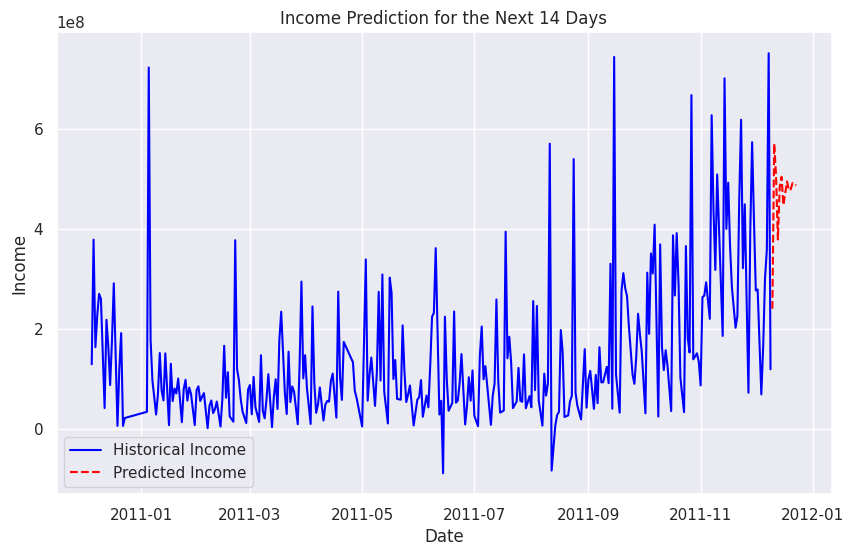

In [39]:
# Generate the next 14 days
last_date = df.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=14)

# Prepare the future DataFrame with lags and rolling mean
future_df = pd.DataFrame({'date': future_dates})
future_df['Year'] = future_df['date'].dt.year
future_df['Month'] = future_df['date'].dt.month
future_df['Day'] = future_df['date'].dt.day

# Initialize an empty list to store future predictions
future_predictions = []

# Use the last available lags and rolling mean for prediction
for i in range(14):
    if i == 0:
        future_df.loc[i, 'Lag0'] = df.iloc[-1]['income']
        future_df.loc[i, 'Lag1'] = df.iloc[-2]['income']
        future_df.loc[i, 'Lag2'] = df.iloc[-3]['income']
        future_df.loc[i, 'Lag3'] = df.iloc[-4]['income']
        future_df.loc[i, 'RollingMean'] = df.iloc[-3:]['income'].mean()
    else:
        future_df.loc[i, 'Lag0'] = future_predictions[-1]
        future_df.loc[i, 'Lag1'] = future_predictions[-2] if i > 1 else df.iloc[-1]['income']
        future_df.loc[i, 'Lag2'] = future_predictions[-3] if i > 2 else df.iloc[-2]['income']
        future_df.loc[i, 'Lag3'] = future_predictions[-4] if i > 3 else df.iloc[-3]['income']
        future_df.loc[i, 'RollingMean'] = np.mean(future_predictions[-3:]) if i >= 3 else df.iloc[-3:]['income'].mean()

    # Prepare features for the current prediction
    X_future = future_df.loc[i, ['Lag1', 'Lag3', 'RollingMean', 'Year', 'Month', 'Day']].values.reshape(1, -1)

    # Predict income and store it
    predicted_value = pipeline.predict(X_future)[0]
    future_predictions.append(predicted_value)

# Add predictions to future_df
future_df['Predicted_Income'] = future_predictions

# Print the predicted values
print(future_df[['date', 'Predicted_Income']])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['income'], label='Historical Income', color='blue')
plt.plot(future_df['date'], future_df['Predicted_Income'], label='Predicted Income', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Income')
plt.title('Income Prediction for the Next 14 Days')
plt.legend()
plt.show()